# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [1]:
# student 1: David 0921

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report


In [3]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [4]:
# Load datasets
train_df = pd.read_csv('titanic_train.csv')
test_df = pd.read_csv('titanic_test.csv')

In [5]:
# Preview datasets
print("Preview of the training data:")
print(train_df.head())
print("\nPreview of the test data:")
print(test_df.head())

Preview of the training data:
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Survived
0       1    0  54.0      1      0  78.2667         1         1
1       2    0  45.0      0      0  13.5000         0         1
2       3    1  20.0      0      0   9.5000         0         0
3       3    1  36.0      0      0   7.8958         0         0
4       3    1  22.0      0      0   8.0500         0         0

Preview of the test data:
   Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  Survived
0       3    1  35.000000      0      0   7.0500         0         0
1       3    1  30.000000      0      0   7.2500         0         0
2       3    1  29.699118      0      0  14.5000         0         0
3       3    0  21.000000      0      0   7.7500         2         0
4       3    1  32.000000      0      0  56.4958         0         1


In [6]:
# Summary statistics
print("\nTraining set summary statistics:")
print(train_df.describe())

print("\nTest set summary statistics:")
print(test_df.describe())


Training set summary statistics:
           Pclass         Sex         Age       SibSp       Parch        Fare  \
count  712.000000  712.000000  712.000000  712.000000  712.000000  712.000000   
mean     2.294944    0.640449   29.531213    0.528090    0.384831   32.379429   
std      0.841990    0.480206   13.188028    1.055052    0.803085   49.836074   
min      1.000000    0.000000    0.670000    0.000000    0.000000    0.000000   
25%      1.750000    0.000000   22.000000    0.000000    0.000000    7.925000   
50%      3.000000    1.000000   29.699118    0.000000    0.000000   14.500000   
75%      3.000000    1.000000   35.000000    1.000000    0.000000   31.275000   
max      3.000000    1.000000   80.000000    8.000000    6.000000  512.329200   

         Embarked    Survived  
count  712.000000  712.000000  
mean     0.372191    0.394663  
std      0.649970    0.489122  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      1.0

In [7]:
# Check for missing values
print("\nMissing values in the dataset:")
print(train_df.isnull().sum())


Missing values in the dataset:
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64


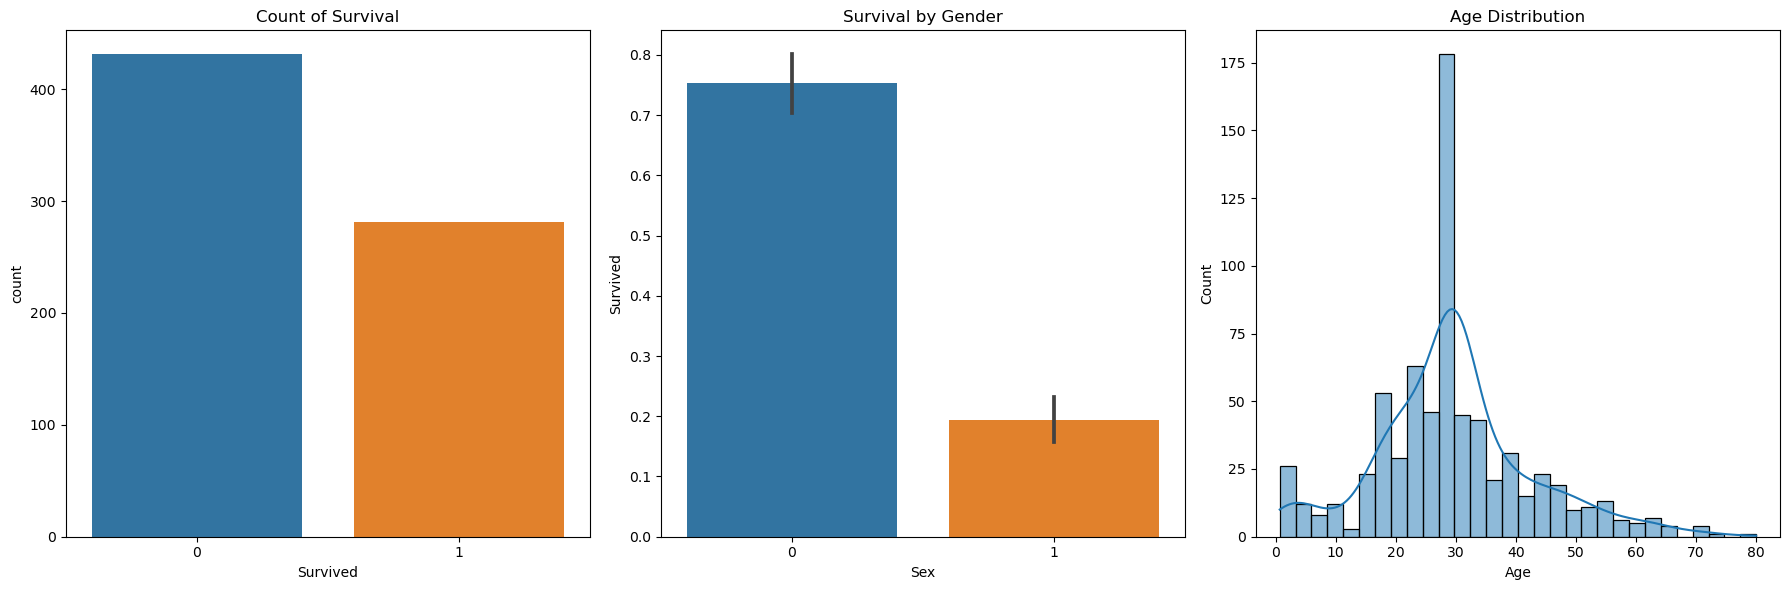

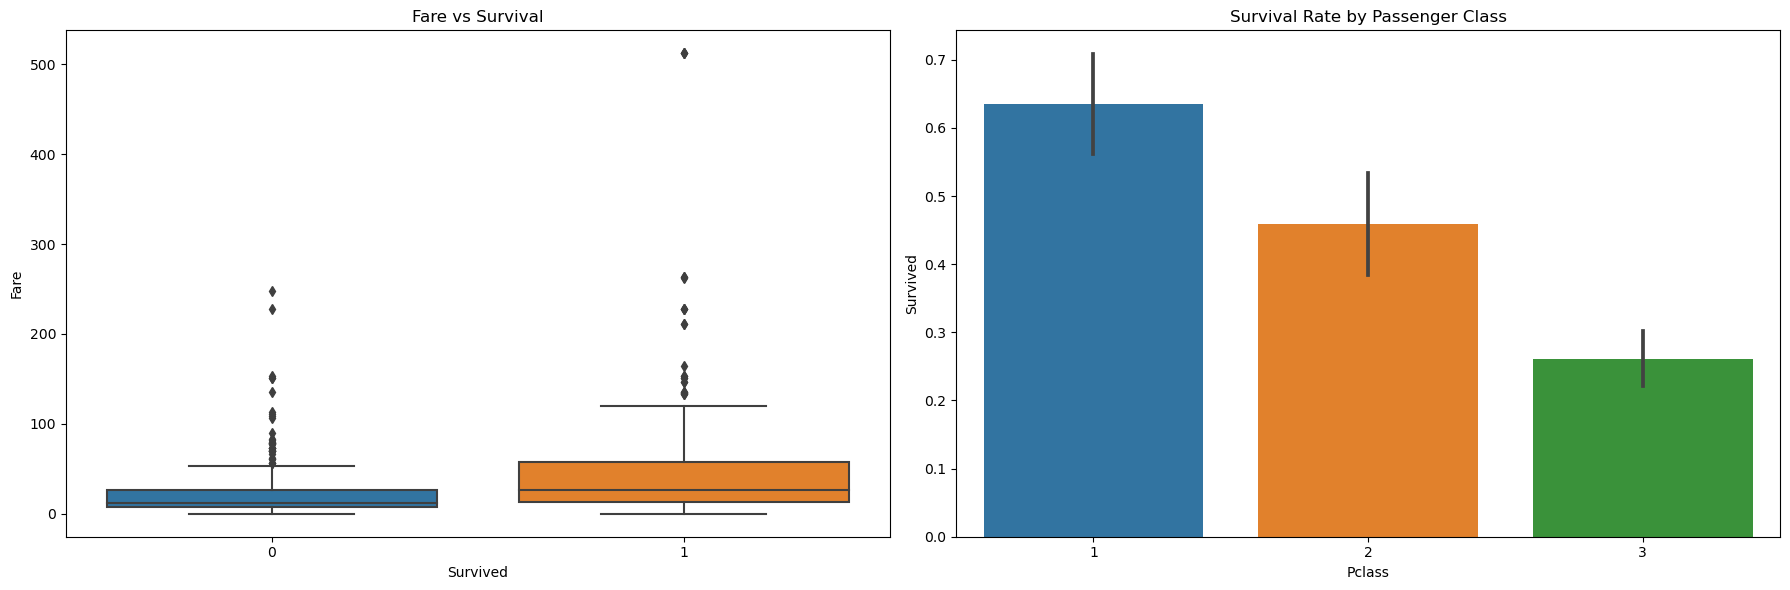

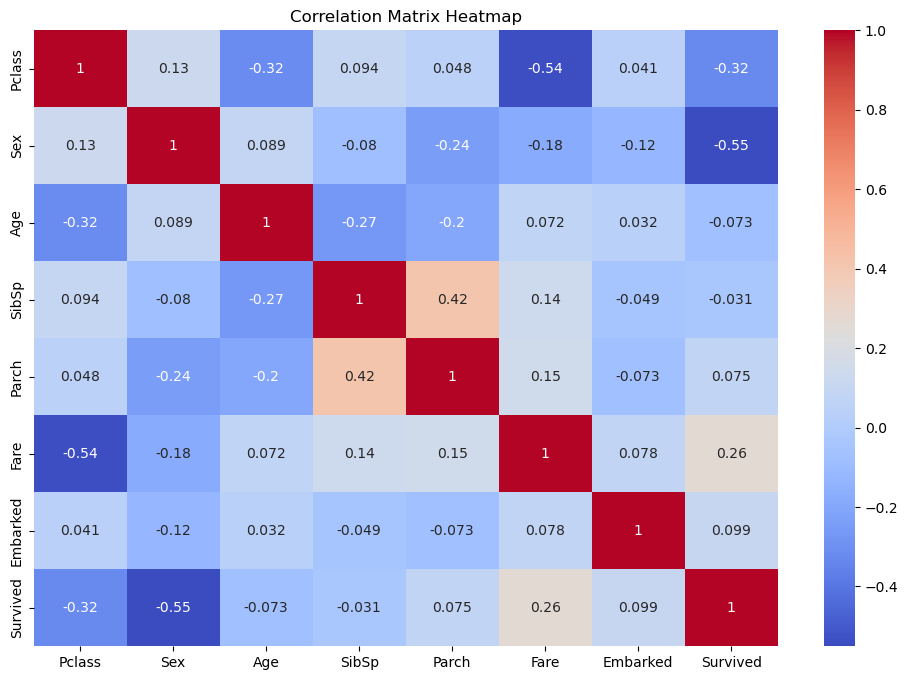

In [8]:
# Setting up subplots for visualizations
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
sns.countplot(x='Survived', data=train_df, ax=axs[0])
axs[0].set_title('Count of Survival')

# Plot 2: Barplot to visualize survival based on gender
sns.barplot(x='Sex', y='Survived', data=train_df, ax=axs[1])
axs[1].set_title('Survival by Gender')

# Plot 3: Histogram with KDE for age distribution
sns.histplot(train_df['Age'].dropna(), kde=True, bins=30, ax=axs[2])
axs[2].set_title('Age Distribution')

# Adjust the layout for better spacing
plt.tight_layout()
plt.show()

# Creating another set of visualizations
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Plot 4: Boxplot for fare based on survival status
sns.boxplot(x='Survived', y='Fare', data=train_df, ax=axs[0])
axs[0].set_title('Fare vs Survival')

# Plot 5: Barplot for passenger class and survival rate
sns.barplot(x='Pclass', y='Survived', data=train_df, ax=axs[1])
axs[1].set_title('Survival Rate by Passenger Class')

# Adjust the layout for clear visuals
plt.tight_layout()
plt.show()

# Correlation matrix heatmap visualization
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [9]:
# Defining numeric and categorical feature columns
numeric_features = ['Age', 'Fare']
categorical_features = ['Pclass', 'Sex', 'Embarked']

# Defining transformation pipelines for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combining both numeric and categorical transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [10]:
models = {
    'logistic_regression': Pipeline(steps=[
        ('preprocessor', preprocessor),  # Feature preprocessing
        ('classifier', LogisticRegression())  # Logistic Regression classifier
    ]),
    'random_forest': Pipeline(steps=[
        ('preprocessor', preprocessor),  # Feature preprocessing
        ('classifier', RandomForestClassifier())  # Random Forest classifier
    ])
}

# Define the hyperparameter grids for both models
param_grids = {
    'logistic_regression': {'classifier__C': [0.1, 1, 10]},  # Hyperparameter grid for Logistic Regression
    'random_forest': {'classifier__n_estimators': [50, 100, 200]}  # Hyperparameter grid for Random Forest
}

# Perform cross-validation for each model and its hyperparameters
def perform_grid_search(model_name, model, param_grid):
    """
    Perform grid search with cross-validation for a given model.
    
    :param model_name: Name of the model (string)
    :param model: Pipeline model to be evaluated
    :param param_grid: Hyperparameter grid for tuning
    :return: Fitted grid search object
    """
    print(f"Performing GridSearchCV for {model_name}...")
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1')
    grid_search.fit(train_df.drop(columns='Survived'), train_df['Survived'])
    return grid_search

# Run grid search for Logistic Regression
grid_lr = perform_grid_search('Logistic Regression', models['logistic_regression'], param_grids['logistic_regression'])

# Run grid search for Random Forest
grid_rf = perform_grid_search('Random Forest', models['random_forest'], param_grids['random_forest'])

Performing GridSearchCV for Logistic Regression...
Performing GridSearchCV for Random Forest...


Best Logistic Regression: {'classifier__C': 1}, F1-score: 0.7397072616347421
Best Random Forest: {'classifier__n_estimators': 100}, F1-score: 0.7462307299163682
Summary of Cross-Validation Results:
                              params  mean_test_score                Model
0             {'classifier__C': 0.1}         0.737440  Logistic Regression
1               {'classifier__C': 1}         0.739707  Logistic Regression
2              {'classifier__C': 10}         0.738519  Logistic Regression
3   {'classifier__n_estimators': 50}         0.733671        Random Forest
4  {'classifier__n_estimators': 100}         0.746231        Random Forest
5  {'classifier__n_estimators': 200}         0.739356        Random Forest


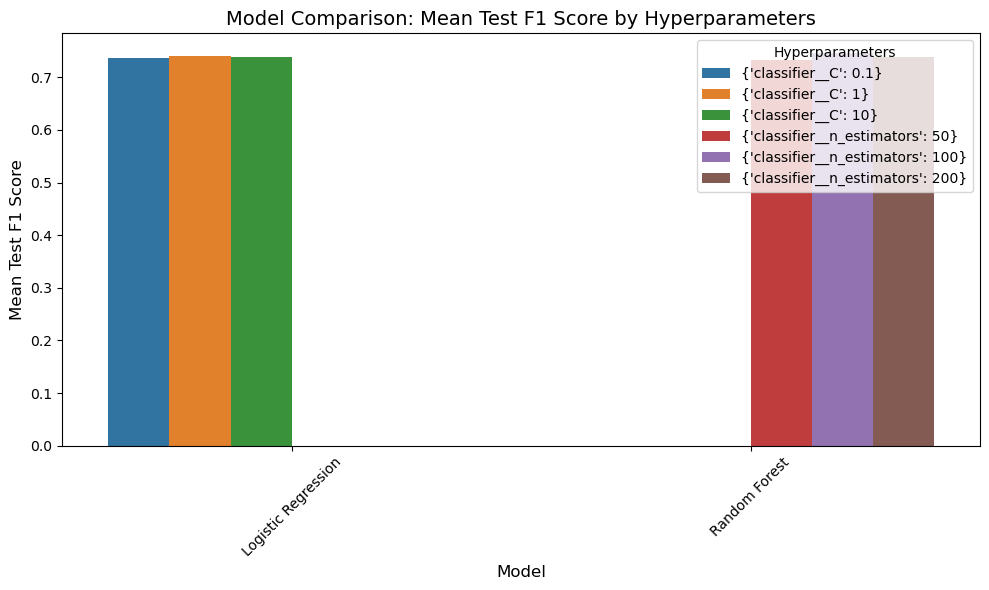

In [11]:
best_params_lr = grid_lr.best_params_
best_score_lr = grid_lr.best_score_

best_params_rf = grid_rf.best_params_
best_score_rf = grid_rf.best_score_

# Print the best models
print(f"Best Logistic Regression: {best_params_lr}, F1-score: {best_score_lr}")
print(f"Best Random Forest: {best_params_rf}, F1-score: {best_score_rf}")

# Collecting cross-validation results
cv_results_lr = pd.DataFrame(grid_lr.cv_results_)[['params', 'mean_test_score']]
cv_results_lr['Model'] = 'Logistic Regression'

cv_results_rf = pd.DataFrame(grid_rf.cv_results_)[['params', 'mean_test_score']]
cv_results_rf['Model'] = 'Random Forest'

# Combine the results into a single DataFrame
summary_results = pd.concat([cv_results_lr, cv_results_rf], ignore_index=True)

# Print summary results
print("Summary of Cross-Validation Results:")
print(summary_results)

# Create a column with readable parameter names for plotting
summary_results['params_str'] = summary_results['params'].apply(lambda x: str(x))

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot to show the mean test scores for each model
sns.barplot(data=summary_results, x='Model', y='mean_test_score', hue='params_str')

# Set plot title and labels
plt.title('Model Comparison: Mean Test F1 Score by Hyperparameters', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Mean Test F1 Score', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Hyperparameters', loc='best')

# Display the plot
plt.tight_layout()
plt.show()

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [12]:
best_model = grid_rf.best_estimator_

# Display the best hyperparameters
print("Best Hyperparameters for Random Forest:")
print(grid_rf.best_params_)

# Display the type of the best model
print(f"\nBest model type: {type(best_model.named_steps['classifier'])}")

# Feature importance (for Random Forest)
if hasattr(best_model.named_steps['classifier'], 'feature_importances_'):
    feature_importances = best_model.named_steps['classifier'].feature_importances_
    feature_names = numeric_features + list(best_model.named_steps['preprocessor']
                                            .transformers_[1][1]  # Getting the categorical transformer
                                            .named_steps['onehot']
                                            .get_feature_names(categorical_features))

    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)
    
    print("\nFeature Importances (Random Forest):")
    print(feature_importance_df)

# Retrain the best model on the entire training data
best_model.fit(train_df.drop(columns='Survived'), train_df['Survived'])

# Predictions on training data
train_predictions = best_model.predict(train_df.drop(columns='Survived'))

# Calculate evaluation metrics on the training data
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# F1-Score
f1_train = f1_score(train_df['Survived'], train_predictions)
print(f"\nF1 Score on train data (Best Model): {f1_train}")

# Accuracy
accuracy_train = accuracy_score(train_df['Survived'], train_predictions)
print(f"Accuracy on train data: {accuracy_train}")

# Confusion Matrix
conf_matrix_train = confusion_matrix(train_df['Survived'], train_predictions)
print("\nConfusion Matrix on train data:")
print(conf_matrix_train)

# Classification Report (Precision, Recall, F1-Score)
class_report_train = classification_report(train_df['Survived'], train_predictions)
print("\nClassification Report on train data:")
print(class_report_train)

Best Hyperparameters for Random Forest:
{'classifier__n_estimators': 100}

Best model type: <class 'sklearn.ensemble._forest.RandomForestClassifier'>

Feature Importances (Random Forest):
       Feature  Importance
1         Fare    0.299151
0          Age    0.289937
6        Sex_1    0.147766
5        Sex_0    0.143527
4     Pclass_3    0.049665
2     Pclass_1    0.025496
3     Pclass_2    0.014734
7   Embarked_0    0.012061
8   Embarked_1    0.011272
9   Embarked_2    0.006382
10  Embarked_3    0.000009

F1 Score on train data (Best Model): 0.9732620320855615
Accuracy on train data: 0.9789325842696629

Confusion Matrix on train data:
[[424   7]
 [  8 273]]

Classification Report on train data:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       431
           1       0.97      0.97      0.97       281

    accuracy                           0.98       712
   macro avg       0.98      0.98      0.98       712
weighted avg       0.9

## Part 5 - Apply on test and show model performance estimation

F1 Score on test data (Best Model): 0.8
Accuracy on test data: 0.8659217877094972

Confusion Matrix on test data:
[[107  11]
 [ 13  48]]

Classification Report on test data:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       118
           1       0.81      0.79      0.80        61

    accuracy                           0.87       179
   macro avg       0.85      0.85      0.85       179
weighted avg       0.87      0.87      0.87       179



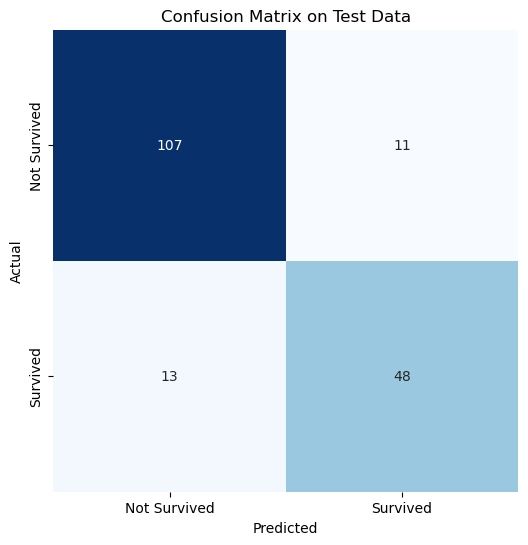

In [13]:
X_test = test_df.drop(columns='Survived')
y_test = test_df['Survived']

# Predict on the test set
test_predictions = best_model.predict(X_test)

# Step 2: Calculate F1-score on test data
f1_test = f1_score(y_test, test_predictions)
print(f"F1 Score on test data (Best Model): {f1_test}")

# Step 3: Calculate Accuracy on test data
accuracy_test = accuracy_score(y_test, test_predictions)
print(f"Accuracy on test data: {accuracy_test}")

# Step 4: Confusion Matrix on test data
conf_matrix_test = confusion_matrix(y_test, test_predictions)
print("\nConfusion Matrix on test data:")
print(conf_matrix_test)

# Step 5: Classification Report on test data
class_report_test = classification_report(y_test, test_predictions)
print("\nClassification Report on test data:")
print(class_report_test)

# Step 6: Visualize Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix on Test Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()